In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import cross_val_score

In [49]:
attendance = pd.read_csv("/Users/matthewmaslow/Desktop/ds-save-the-children/dataset/attendance.csv")
attendance.head()

/var/folders/sf/c0xndf0951l35zqvq0zt2vy00000gn/T/ipykernel_60225/1869456014.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  attendance = pd.read_csv("/Users/matthewmaslow/Desktop/ds-save-the-children/dataset/attendance.csv")


,Month,GradeId,StudentIsPresent,ReasonType,StudentAbsenseReason,AttendanceDate,ClassID,ChildrenId,WeekDayN,DistrictName,...,AcademicYearId,AcademicYearName,Year,Project,Gender,Cycle,StudentFullName,RecordId,AcademicYearStartDate,AcademicYearEndtDate
0,Apr-23,14,True,NaN,NaN,"Monday, April 17, 2023",595,4600,1,NaN,...,7.0,NaN,2023.0,NaN,NaN,Batch 2-Cycle 1,NaN,40655,2023/4/10 00:00,2023/6/16 00:00
1,Apr-23,14,True,NaN,NaN,"Monday, April 17, 2023",595,4604,1,NaN,...,7.0,NaN,2023.0,NaN,NaN,Batch 2-Cycle 1,NaN,40656,2023/4/10 00:00,2023/6/16 00:00
2,Apr-23,14,True,NaN,NaN,"Monday, April 17, 2023",595,4594,1,NaN,...,7.0,NaN,2023.0,NaN,NaN,Batch 2-Cycle 1,NaN,40657,2023/4/10 00:00,2023/6/16 00:00
3,Apr-23,14,True,NaN,NaN,"Monday, April 17, 2023",595,4589,1,NaN,...,7.0,NaN,2023.0,NaN,NaN,Batch 2-Cycle 1,NaN,40659,2023/4/10 00:00,2023/6/16 00:00
4,Apr-23,14,True,NaN,NaN,"Monday, April 17, 2023",595,4595,1,NaN,...,7.0,NaN,2023.0,NaN,NaN,Batch 2-Cycle 1,NaN,40660,2023/4/10 00:00,2023/6/16 00:00


In [50]:
# Documentation

## Month 
# Represents the month of the attendance record.
# Null values: 0

## GradeId 
# Represents the grade level of the student for the attendance record.
# Null values: 0

## StudentIsPresent 
# Indicates whether the student was present (True) or absent (False).
# Null values: 0

## ReasonType 
# General reason for student absence (categories: social, unknown, health).
# Null values: 60,130

## StudentAbsenseReason 
# More specific explanation for student absence, clustered under ReasonType.
# Null values: 60,130

## AttendanceDate 
# Date the attendance record was written.
# Null values: 0

## ClassID 
# Unique identifier for the class related to the attendance record.
# Null values: 0

## ChildrenId 
# Unique identifier representing the student for their attendance records.
# Null values: 0

## WeekDayN 
# Numeric representation of the weekday for the attendance record.
# Null values: 0

## DistrictName 
# Name of the school district for the attendance record.
# Null values: 77,205

## SchoolId 
# Unique identifier for the school related to the attendance record.
# Null values: 0

## SchoolName 
# Name of the school related to the attendance record.
# Null values: 77,205

## ClassName 
# Name of the class related to the attendance record.
# Null values: 77,205

## Week 
# Week number related to the attendance record.
# Null values: 0

## WeekNum 
# Numeric representation of the week within the year for sorting purposes.
# Null values: 0

## MonthYearSort 
# Sortable format combining month and year for easy chronological organization.
# Null values: 0

## AcademicYearId 
# Unique identifier for the academic year.
# Null values: 24

## AcademicYearName 
# Name or label of the academic year (e.g., "2022-2023").
# Null values: 28,484

## Year 
# The year part of the academic year or attendance record.
# Null values: 24

## Project 
# Project-related identifier for records or attendance tracking.
# Null values: 28,484

## Gender 
# Gender of the student (e.g., Male, Female, etc.).
# Null values: 77,205

## Cycle 
# Refers to a specific time cycle related to the academic year (e.g., term or semester).
# Null values: 0

## StudentFullName 
# Full name of the student.
# Null values: 77,205

## RecordId 
# Unique identifier for each attendance record.
# Null values: 0

## AcademicYearStartDate 
# Start date of the academic year.
# Null values: 24

## AcademicYearEndDate 
# End date of the academic year.
# Null values: 24

In [51]:
# given the number of null values for some of the columns, may be unessarcy to have in the dataset as those columns are mainly empty,
#    however those columns also can be represented by other datasets when using join-operations.

In [52]:
# Some vizuals to view data below....

In [53]:
attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77205 entries, 0 to 77204
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month                  77205 non-null  object 
 1   GradeId                77205 non-null  int64  
 2   StudentIsPresent       77205 non-null  bool   
 3   ReasonType             17075 non-null  object 
 4   StudentAbsenseReason   17075 non-null  object 
 5   AttendanceDate         77205 non-null  object 
 6   ClassID                77205 non-null  int64  
 7   ChildrenId             77205 non-null  int64  
 8   WeekDayN               77205 non-null  int64  
 9   DistrictName           0 non-null      float64
 10  SchoolId               77205 non-null  int64  
 11  SchoolName             0 non-null      float64
 12  ClassName              0 non-null      float64
 13  Week                   77205 non-null  object 
 14  WeekNum                77205 non-null  int64  
 15  Mo

In [54]:
attendance.isnull().sum()

Month                        0
GradeId                      0
StudentIsPresent             0
ReasonType               60130
StudentAbsenseReason     60130
AttendanceDate               0
ClassID                      0
ChildrenId                   0
WeekDayN                     0
DistrictName             77205
SchoolId                     0
SchoolName               77205
ClassName                77205
Week                         0
WeekNum                      0
MonthYearSort                0
AcademicYearId              24
AcademicYearName         28484
Year                        24
Project                  28484
Gender                   77205
Cycle                        0
StudentFullName          77205
RecordId                     0
AcademicYearStartDate       24
AcademicYearEndtDate        24
dtype: int64

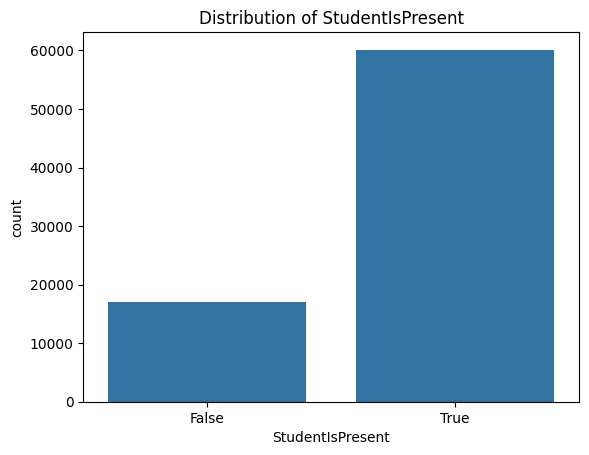

In [55]:
sns.countplot(data=attendance, x='StudentIsPresent')
plt.title('Distribution of StudentIsPresent')
plt.show()

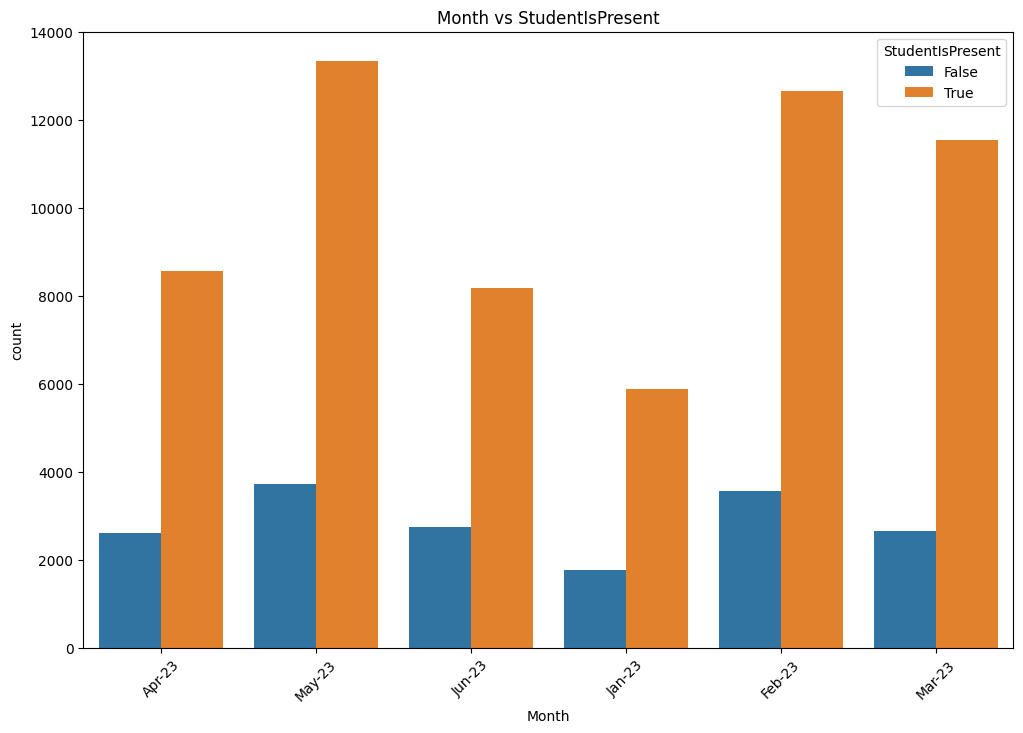

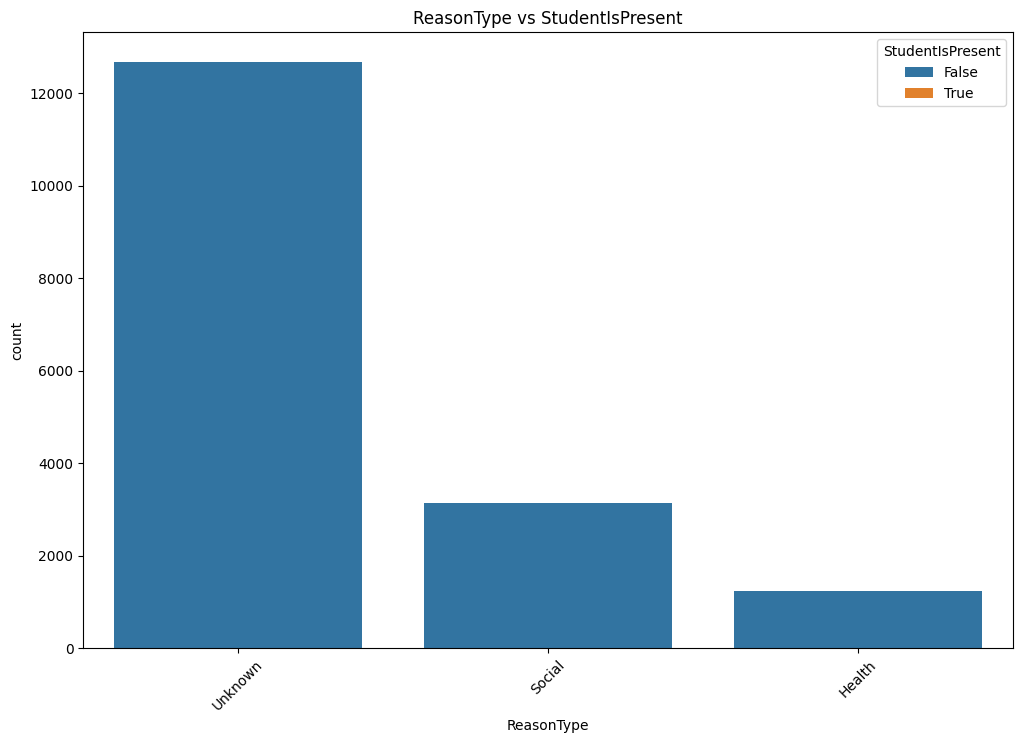

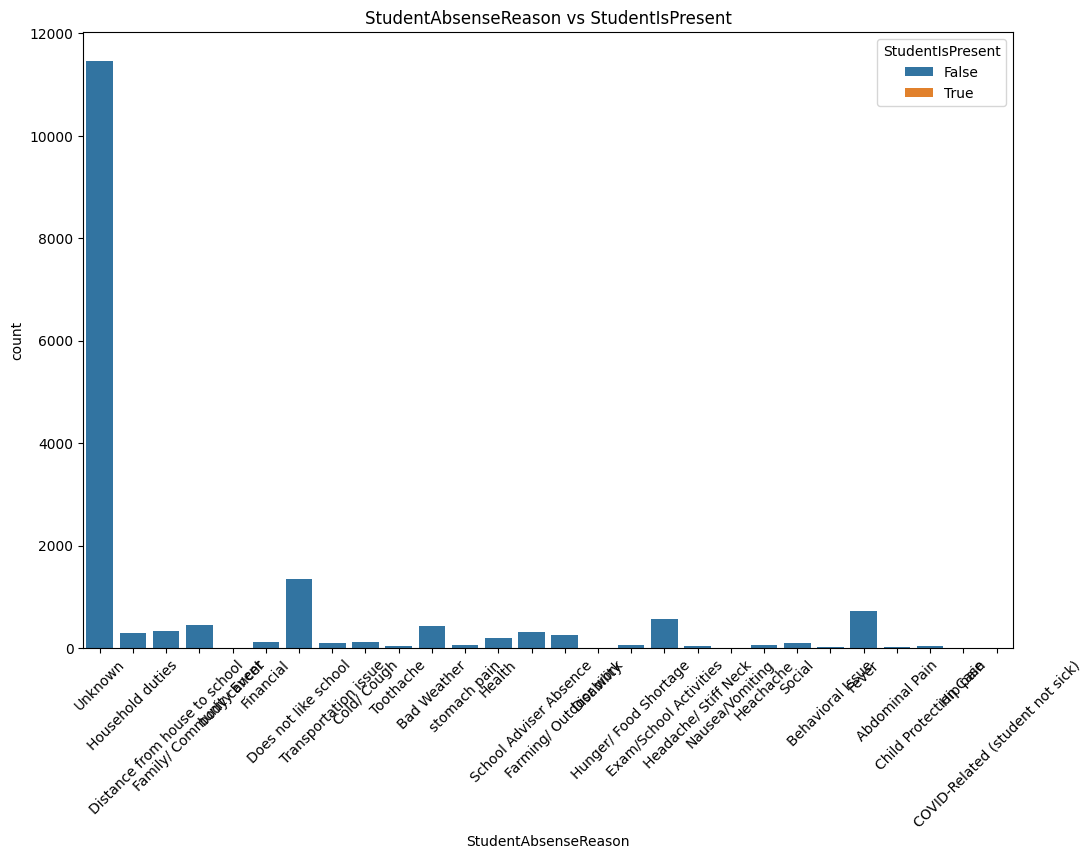

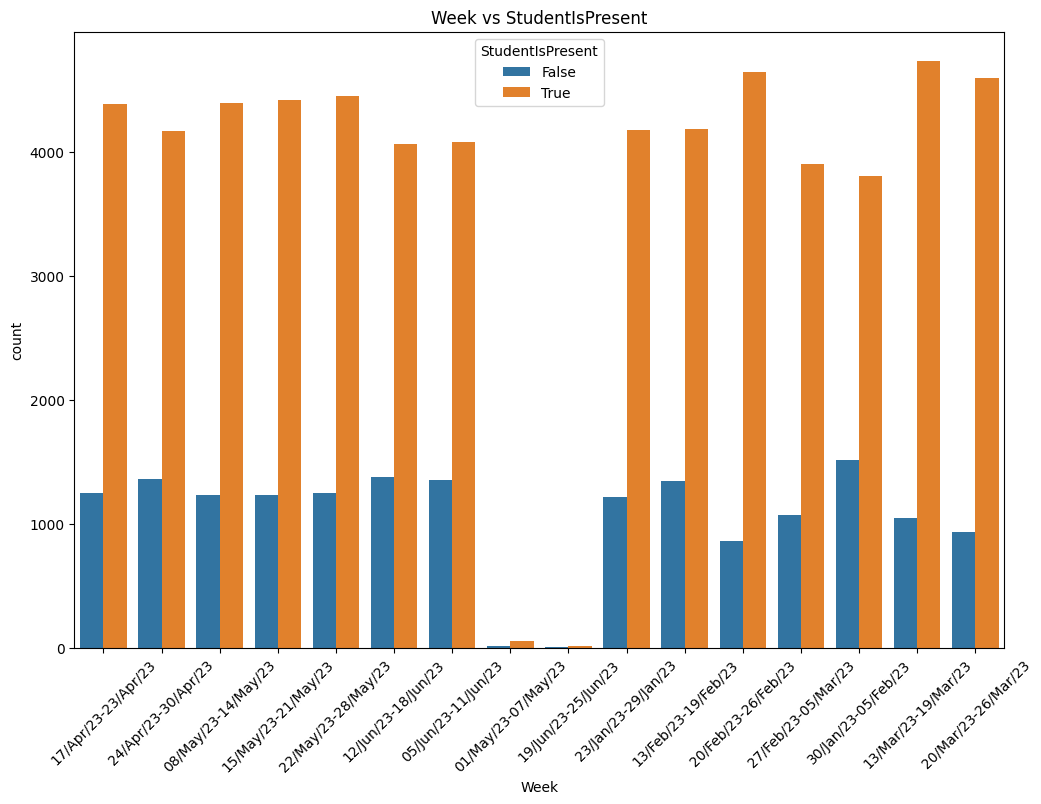

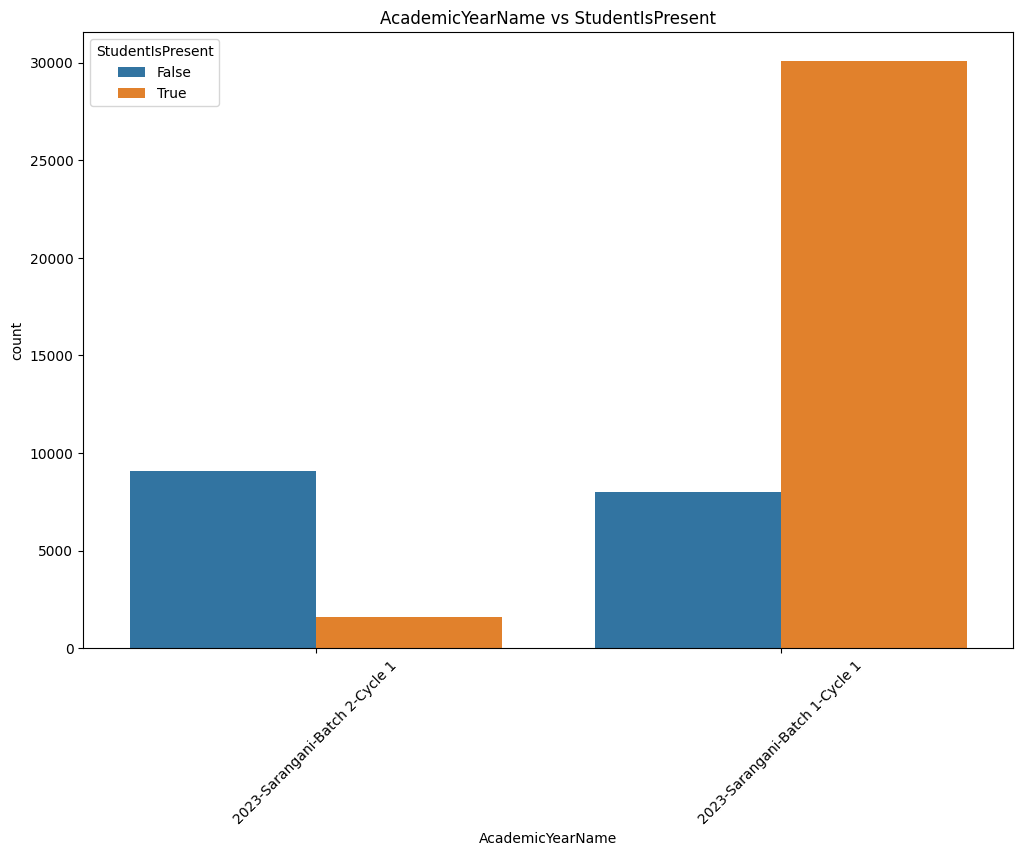

In [56]:
categorical_cols = ['Month', 'ReasonType', 'StudentAbsenseReason', 'Week', 'AcademicYearName']

for col in categorical_cols:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=attendance, x=col, hue='StudentIsPresent')
    plt.title(f'{col} vs StudentIsPresent')
    plt.xticks(rotation=45)
    plt.show()


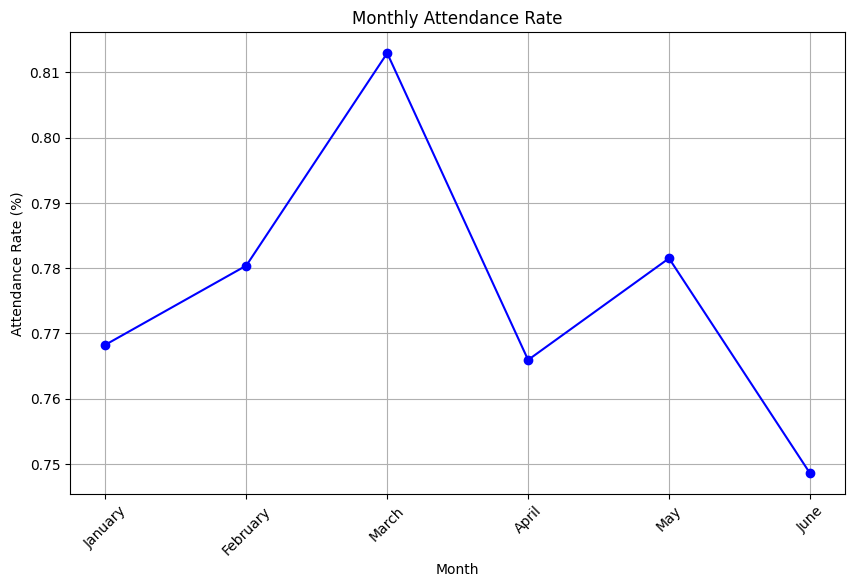

In [57]:
attendance['AttendanceDate'] = pd.to_datetime(attendance['AttendanceDate'], errors='coerce')
if attendance['AttendanceDate'].isnull().any():
    print("There are invalid dates that were converted to NaT")
attendance['Month'] = attendance['AttendanceDate'].dt.month
month_name_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
                  6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 
                  11: 'November', 12: 'December'}

attendance['MonthName'] = attendance['Month'].map(month_name_map)
monthly_attendance = attendance.groupby('MonthName')['StudentIsPresent'].mean()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_attendance = monthly_attendance.reindex(month_order)

plt.figure(figsize=(10, 6))
monthly_attendance.plot(kind='line', marker='o', color='b')
plt.title('Monthly Attendance Rate')
plt.ylabel('Attendance Rate (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [58]:
# new updates for 10/21

In [59]:
attendance_Philippines = pd.read_excel("/Users/matthewmaslow/Desktop/Philippines CuC Data - 2024 10 03.xlsx")
attendance_Philippines.head()

,ChildrenId,ResultBaseline,ResultRound1,ResultRound2,ResultRound3,ResultEndline,Baseline to Round 1,Round 1 to Round 2,Round 2 to Round 3,Round 2 to Endline,...,SchoolId,AcademicYearId,Year,District,Gender,Baseline to Endline - Type,ComprehensionAchieved,StoryAchieved,BatchCycle,AcademicYearName
0,2876,Beginner,Beginner,Beginner,NaN,Beginner,Stayed The Same,Stayed The Same,NaN,Stayed The Same,...,97,6,2023,Malapatan,Male,No Change,False,False,Batch 1-Cycle 1,2023-Sarangani-Batch 1-Cycle 1
1,2248,Beginner,Beginner,Beginner,NaN,Beginner,Stayed The Same,Stayed The Same,NaN,Stayed The Same,...,73,6,2023,Kiamba,Male,No Change,False,False,Batch 1-Cycle 1,2023-Sarangani-Batch 1-Cycle 1
2,2176,Beginner,Beginner,Beginner,NaN,Beginner,Stayed The Same,Stayed The Same,NaN,Stayed The Same,...,68,6,2023,Alabel,Male,No Change,False,False,Batch 1-Cycle 1,2023-Sarangani-Batch 1-Cycle 1
3,2861,Beginner,Beginner,Beginner,NaN,Beginner,Stayed The Same,Stayed The Same,NaN,Stayed The Same,...,97,6,2023,Malapatan,Male,No Change,False,False,Batch 1-Cycle 1,2023-Sarangani-Batch 1-Cycle 1
4,2865,Beginner,Beginner,Beginner,NaN,Beginner,Stayed The Same,Stayed The Same,NaN,Stayed The Same,...,97,6,2023,Malapatan,Male,No Change,False,False,Batch 1-Cycle 1,2023-Sarangani-Batch 1-Cycle 1


In [60]:
attendance_Philippines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397 entries, 0 to 2396
Data columns (total 22 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   ChildrenId                                                       2397 non-null   int64  
 1   ResultBaseline                                                   2354 non-null   object 
 2   ResultRound1                                                     2029 non-null   object 
 3   ResultRound2                                                     2033 non-null   object 
 4   ResultRound3                                                     0 non-null      float64
 5   ResultEndline                                                    2220 non-null   object 
 6   Baseline to Round 1                                              2019 non-null   object 
 7   Round 1 to Round 2                        

In [61]:
# Check how many students have both baseline and endline results
retention_data = attendance_Philippines[['ResultBaseline', 'ResultEndline']].dropna()

# Calculate retention rate (students who have both baseline and endline results)
retention_rate = (len(retention_data) / len(attendance_Philippines)) * 100
print(f"Retention Rate: {retention_rate:.2f}%")

Retention Rate: 91.74%


In [62]:
# Retention by Gender
retention_by_gender = attendance_Philippines.groupby('Gender')[['ResultBaseline', 'ResultEndline']].count()
print(retention_by_gender)

# Retention by District
retention_by_district = attendance_Philippines.groupby('District')[['ResultBaseline', 'ResultEndline']].count()
print(retention_by_district)


        ResultBaseline  ResultEndline
Gender                               
Female             897            852
Male              1457           1368
           ResultBaseline  ResultEndline
District                                
Alabel                387            379
Glan                  338            334
Kiamba                321            316
Maasim                335            322
Maitum                227            189
Malapatan             314            288
Malungon              432            392


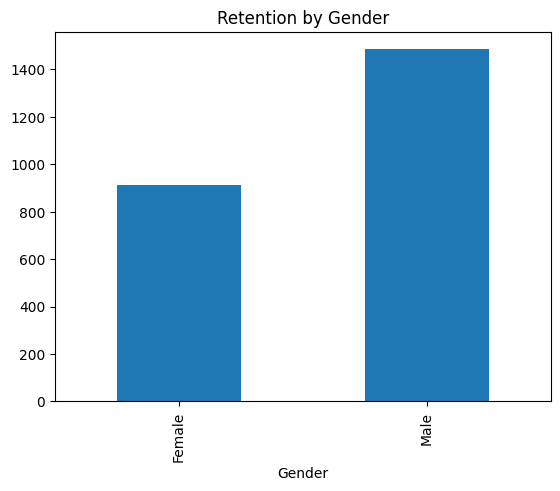

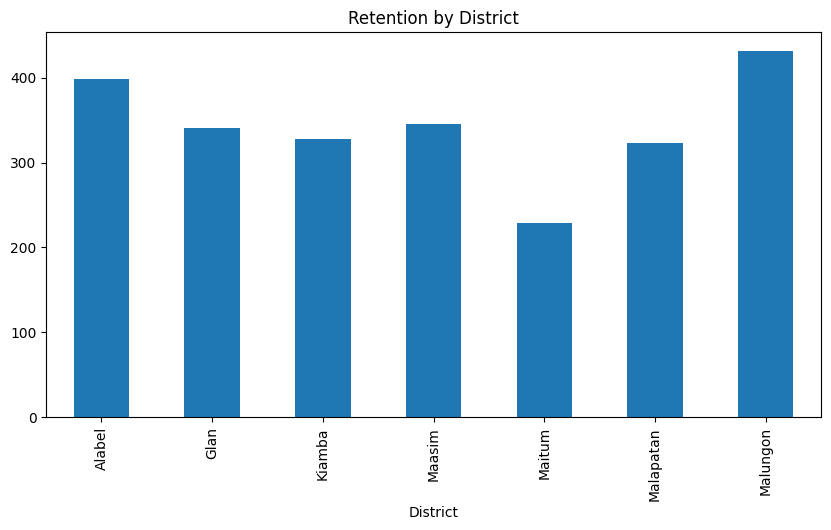

In [63]:
import matplotlib.pyplot as plt

# Retention by Gender Plot
attendance_Philippines.groupby('Gender').size().plot(kind='bar', title='Retention by Gender')
plt.show()

# Retention by District Plot
attendance_Philippines.groupby('District').size().plot(kind='bar', title='Retention by District', figsize=(10,5))
plt.show()


In [93]:
attendance_Uganda = pd.read_excel("/Users/matthewmaslow/Desktop/Uganda - 2024 10 02(v1) (1).xlsx")
attendance_Uganda.head()

,ChildrenId,ResultBaseline,ResultRound1,ResultRound2,ResultRound3,ResultEndline,Baseline to Round 1,Round 1 to Round 2,Round 2 to Round 3,Round 3 to Endline,...,Baseline_Endline,ComprehensionAchieved,StoryAchieved,TrackIncreaseOneLevel,AttendanceIncreaseOneLevel,TotalhoursIncreaseOnelevel,IsCUCSatisfied?,AtLeastAchievedSentence,Identity_Number,SchoolId
0,36161,Word,NaN,Story with comprehension,NaN,Story with comprehension,NaN,NaN,NaN,NaN,...,Increase 3 Levels,True,False,False,NaN,NaN,9.0,True,NaN,185
1,31440,Letter,NaN,Story with comprehension,NaN,Story with comprehension,NaN,NaN,NaN,NaN,...,Increase 4 Levels,True,False,False,NaN,NaN,8.0,True,NaN,185
2,31439,NaN,Word,Story with comprehension,NaN,Story with comprehension,NaN,Increase,NaN,NaN,...,NaN,True,False,False,NaN,NaN,8.0,True,NaN,185
3,36133,NaN,NaN,NaN,NaN,Story with comprehension,NaN,NaN,NaN,NaN,...,NaN,True,False,False,NaN,NaN,8.0,True,NaN,185
4,36143,Word,NaN,NaN,NaN,Story with comprehension,NaN,NaN,NaN,NaN,...,Increase 3 Levels,True,False,False,NaN,NaN,8.0,True,NaN,185


In [94]:
attendance_Uganda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32695 entries, 0 to 32694
Data columns (total 25 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   ChildrenId                                                       32695 non-null  int64  
 1   ResultBaseline                                                   25579 non-null  object 
 2   ResultRound1                                                     22282 non-null  object 
 3   ResultRound2                                                     16883 non-null  object 
 4   ResultRound3                                                     3206 non-null   object 
 5   ResultEndline                                                    15375 non-null  object 
 6   Baseline to Round 1                                              17749 non-null  object 
 7   Round 1 to Round 2                      

Missing values per column:
 AttendanceIncreaseOneLevel    16715
TotalhoursIncreaseOnelevel    16715
dtype: int64


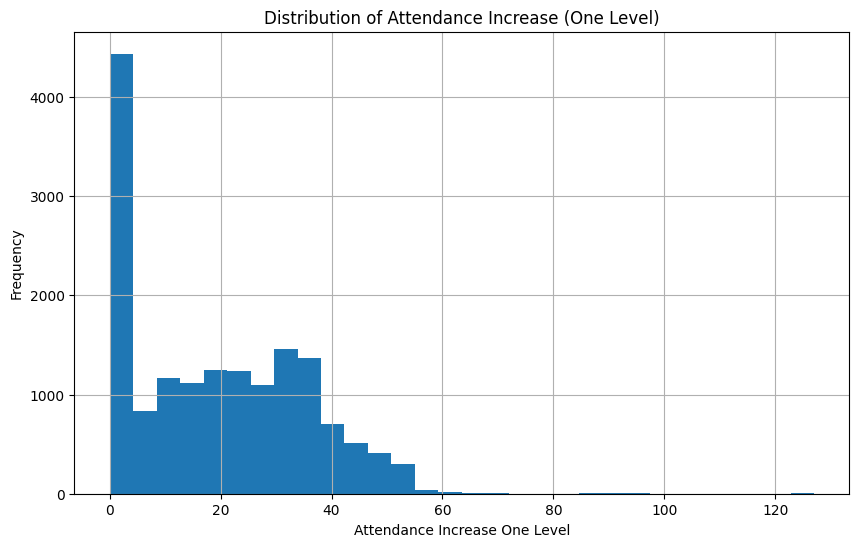

In [101]:
# 1. Missing Data Analysis
attendance_cols = ['AttendanceIncreaseOneLevel', 'TotalhoursIncreaseOnelevel']
missing_data = attendance_Uganda[attendance_cols].isnull().sum()
print("Missing values per column:\n", missing_data)

# 2. Attendance Trends: Distribution of AttendanceIncreaseOneLevel
plt.figure(figsize=(10, 6))
attendance_Uganda['AttendanceIncreaseOneLevel'].dropna().hist(bins=30)
plt.title('Distribution of Attendance Increase (One Level)')
plt.xlabel('Attendance Increase One Level')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

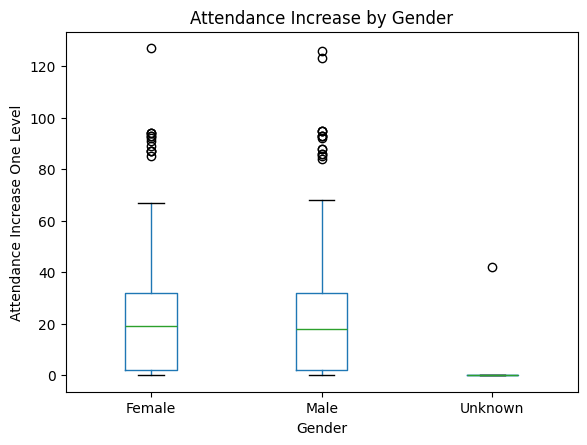

In [105]:
plt.figure(figsize=(10, 6))
attendance_Uganda.boxplot(column='AttendanceIncreaseOneLevel', by='Gender', grid=False)
plt.title('Attendance Increase by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Attendance Increase One Level')
plt.show()